In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('kinetics.csv', names = ['t', 'c2'])
df

,t,c2
0,0,0.02
1,1,0.48
2,2,0.48
3,3,0.35
4,4,0.24
5,5,0.15
6,6,0.08
7,7,0.05
8,8,0.03
9,9,0.04


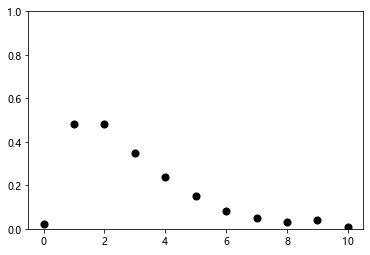

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df['t'], df['c2'], s = 50, c = 'k')
plt.ylim(0.0, 1.0)
plt.show()

In [6]:
def func(t, k1, k2):
    c10 = 1.0
    c2 = k1 * c10 / (k2 - k1) * (np.exp(-k1 * t) - np.exp(-k2 * t))
    return c2

In [7]:
from scipy.optimize import curve_fit

pfit, pcov = curve_fit(func, df['t'], df['c2'], p0 = [0, 1]) #pfit为待拟合的参数，pcov为协方差矩阵，curve_fit(func, x_val,y_val)固定格式，p0=[0,1]为k1，k2的初始值

In [8]:
pfit

array([1.02802611, 0.49507999])

In [9]:
pcov

array([[ 1.55979174e-03, -6.27713433e-05],
       [-6.27713433e-05,  7.74305674e-05]])

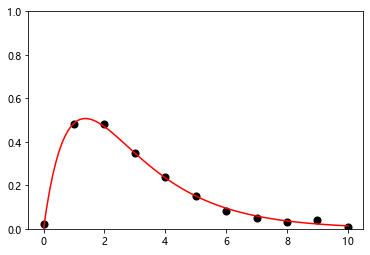

In [11]:
plt.scatter(df['t'], df['c2'], s = 50, c = 'k')
t_cuv = np.linspace(0, 10, 100) #在0-10之间取100个点，使曲线更光滑
plt.plot(t_cuv, func(t_cuv, *pfit), c = 'r') # *pfit为传入拟合好的k1,k2
plt.ylim(0.0, 1.0)
plt.show()